In [190]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

from tqdm.notebook import tqdm
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage import rotate
from PIL import Image

In [3]:
file_path = os.listdir('dataset\img')

# DEMO AUGMENTATION

In [10]:
img_demo = plt.imread('dataset\\img\\' + file_path[0])

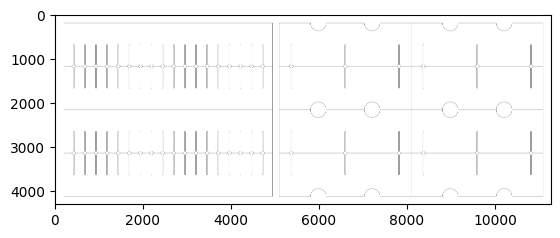

In [12]:
plt.imshow(img_demo);

## ROTATION

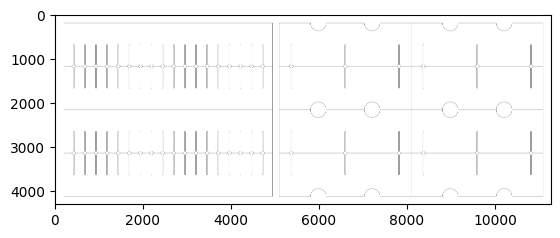

In [33]:
plt.imshow(img_demo)

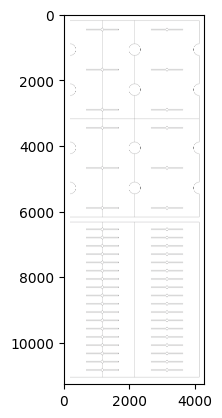

In [35]:
plt.imshow(rotate(img_demo, 90*1))

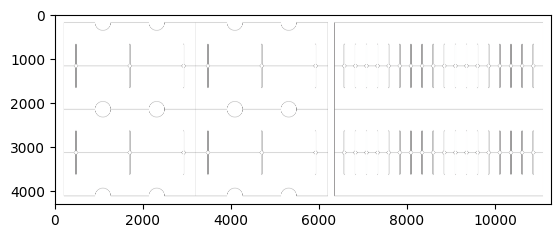

In [36]:
plt.imshow(rotate(img_demo, 90*2))

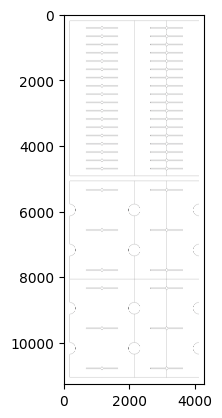

In [37]:
plt.imshow(rotate(img_demo, 90*3))

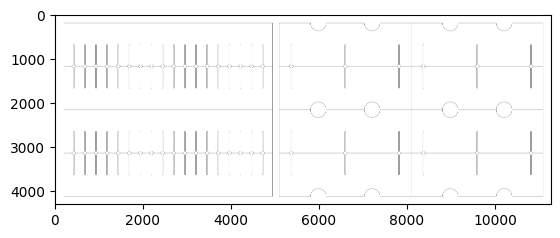

In [38]:
plt.imshow(rotate(img_demo, 90*4))

# SHIFTING

In [50]:
def pad_vector(vector, how, depth, constant_value=255):
    vect_shape = vector.shape[:2]
    if (how == 'upper') or (how == 'top'):
        pp = np.full(shape=(depth, vect_shape[1]), fill_value=constant_value)
        pv = np.vstack(tup=(pp, vector))
    elif (how == 'lower') or (how == 'bottom'):
        pp = np.full(shape=(depth, vect_shape[1]), fill_value=constant_value)
        pv = np.vstack(tup=(vector, pp))
    elif (how == 'left'):
        pp = np.full(shape=(vect_shape[0], depth), fill_value=constant_value)
        pv = np.hstack(tup=(pp, vector))
    elif (how == 'right'):
        pp = np.full(shape=(vect_shape[0], depth), fill_value=constant_value)
        pv = np.hstack(tup=(vector, pp))
    else:
        return vector
    return pv

def shifter(vect, y, y_):
    if (y > 0):
        image_trans = pad_vector(vector=vect, how='lower', depth=y_)
    elif (y < 0):
        image_trans = pad_vector(vector=vect, how='upper', depth=y_)
    else:
        image_trans = vect
    return image_trans

def shift_image(image_src, at):
    x, y = at
    x_, y_ = abs(x), abs(y)

    if (x > 0):
        left_pad = pad_vector(vector=image_src, how='left', depth=x_)
        image_trans = shifter(vect=left_pad, y=y, y_=y_)
    elif (x < 0):
        right_pad = pad_vector(vector=image_src, how='right', depth=x_)
        image_trans = shifter(vect=right_pad, y=y, y_=y_)
    else:
        image_trans = shifter(vect=image_src, y=y, y_=y_)

    return image_trans

def translate_this(image_src, at, with_plot=False, gray_scale=False):
    if len(at) != 2: return False

    if not gray_scale:
        r_image, g_image, b_image = image_src[:, :, 0], image_src[:, :, 1], image_src[:, :, 2]
        r_trans = shift_image(image_src=r_image, at=at)
        g_trans = shift_image(image_src=g_image, at=at)
        b_trans = shift_image(image_src=b_image, at=at)
        image_trans = np.dstack(tup=(r_trans, g_trans, b_trans))
    else:
        image_trans = shift_image(image_src=image_src, at=at)

    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Translated")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_trans, cmap=cmap_val)
        return True
    return image_trans

True

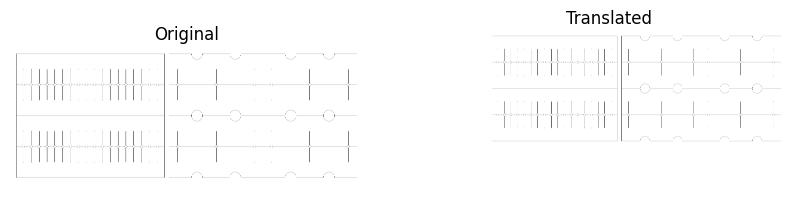

In [51]:
translate_this(
    image_src=img_demo,
    at=(2000, 2000),
    with_plot=True
)

True

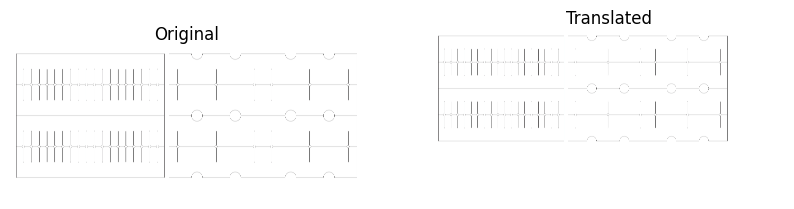

In [52]:
translate_this(
    image_src=img_demo,
    at=(-2000, 2000),
    with_plot=True
)

True

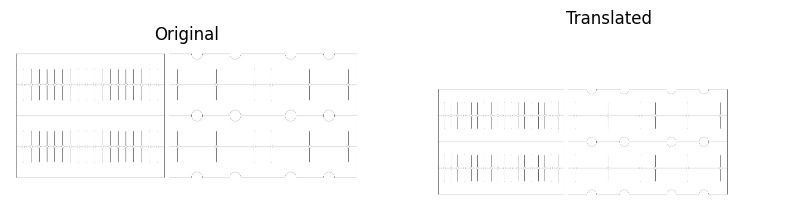

In [53]:
translate_this(
    image_src=img_demo,
    at=(-2000, -2000),
    with_plot=True
)

True

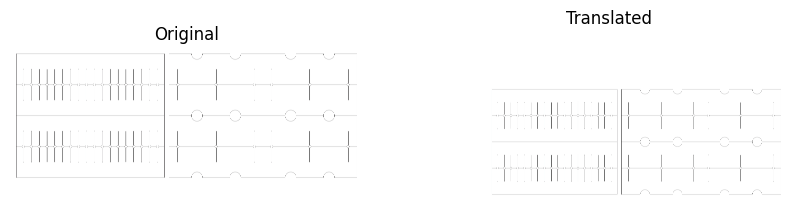

In [54]:
translate_this(
    image_src=img_demo,
    at=(2000, -2000),
    with_plot=True
)

## GENERATE FILE

In [65]:
with open('dataset/file_path.txt', 'w') as f:
    for path in file_path:
        f.write(path)
        f.write('\n')

In [195]:
for path in tqdm(file_path):
    img_original = np.array(Image.open("dataset//img//" + path).convert('RGB'))
    
    img_rotate_1 = rotate(img_original, 90*1)
    img_rotate_2 = rotate(img_original, 90*2)
    img_rotate_3 = rotate(img_original, 90*3)
    img_rotate_4 = rotate(img_original, 90*4)
    
    w, h = img_original.shape[0:2]
    pad_w = int(w * 0.25)
    pad_h = int(h * 0.25)
    
    img_shift_1 = translate_this(
        image_src=img_original,
        at=(pad_w, pad_h),
        with_plot=False,
        gray_scale= gray_scale
    )
    img_shift_2 = translate_this(
        image_src=img_original,
        at=(-pad_w, pad_h),
        with_plot=False,
        gray_scale= gray_scale
    )
    img_shift_3 = translate_this(
        image_src=img_original,
        at=(pad_w, -pad_h),
        with_plot=False,
        gray_scale= gray_scale
    )
    img_shift_4 = translate_this(
        image_src=img_original,
        at=(-pad_w, -pad_h),
        with_plot=False,
        gray_scale= gray_scale
    )
    
    file_name = 'dataset\\img\\' + path[:-4] + "_rotate_1.jpg"
    cv2.imwrite(file_name, img_rotate_1)
    file_name = 'dataset\\img\\' + path[:-4] + "_rotate_2.jpg"
    cv2.imwrite(file_name, img_rotate_2)
    file_name = 'dataset\\img\\' + path[:-4] + "_rotate_3.jpg"
    cv2.imwrite(file_name, img_rotate_3)
    file_name = 'dataset\\img\\' + path[:-4] + "_rotate_4.jpg"
    cv2.imwrite(file_name, img_rotate_4)
    
    file_name = 'dataset\\img\\' + path[:-4] + "_shift_1.jpg"
    cv2.imwrite(file_name, img_shift_1)
    file_name = 'dataset\\img\\' + path[:-4] + "_shift_2.jpg"
    cv2.imwrite(file_name, img_shift_2)
    file_name = 'dataset\\img\\' + path[:-4] + "_shift_3.jpg"
    cv2.imwrite(file_name, img_shift_3)
    file_name = 'dataset\\img\\' + path[:-4] + "_shift_4.jpg"
    cv2.imwrite(file_name, img_shift_4)

  0%|          | 0/110 [00:00<?, ?it/s]

In [206]:
img_original = np.array(Image.open("dataset//img//" + "img_8.jpg").convert('RGB'))

In [207]:
img_original.shape

(561, 434, 3)

In [208]:
img_original.max()

255

In [209]:
img_original.min()

0

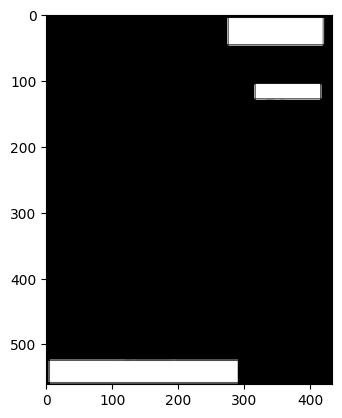

In [210]:
plt.imshow(img_original)

In [165]:
img_original = cv2.convertScaleAbs(img_original, alpha=(255.0))

In [167]:
img_original.max()

255

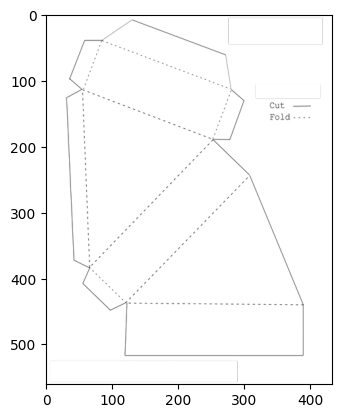

In [168]:
plt.imshow(img_original)